##**Problem statement: Establish relation between mpg and other attributes**

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("/content/auto-mpg.csv")

In [7]:
df.shape

(398, 9)

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
229,16.0,8,400.0,180,4220,11.1,77,1,pontiac grand prix lj
15,22.0,6,198.0,95,2833,15.5,70,1,plymouth duster
343,39.1,4,79.0,58,1755,16.9,81,3,toyota starlet
31,25.0,4,113.0,95,2228,14.0,71,3,toyota corona
58,25.0,4,97.5,80,2126,17.0,72,1,dodge colt hardtop
282,22.3,4,140.0,88,2890,17.3,79,1,ford fairmont 4
138,14.0,8,318.0,150,4457,13.5,74,1,dodge coronet custom (sw)
237,30.5,4,98.0,63,2051,17.0,77,1,chevrolet chevette
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
128,15.0,6,250.0,100,3336,17.0,74,1,chevrolet nova


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#1. The above data shows the horsepower to be object but the entries are in numerical form so we need to find where the problem is and convert it to int
#2. We will drop car name as it is irrelevant here
#3. We need to encode origin column to get int type

##**Dropping car name column**

In [11]:
df.drop("car name",axis=1,inplace=True)

In [12]:
df.shape

(398, 8)

##**Working the horsepower column**

**to show all the columns add the following code at start where we import packages**

**pd.set_option('display.max_columns',None)**

**pd.set_option('display.max_rows',None)**

In [13]:
df['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
105    12
70     12
67     12
65     10
97      9
85      9
80      7
145     7
140     7
92      6
68      6
78      6
84      6
?       6
72      6
180     5
71      5
86      5
115     5
130     5
60      5
170     5
175     5
83      4
120     4
76      4
165     4
52      4
190     3
125     3
215     3
48      3
63      3
112     3
225     3
96      3
69      3
74      3
129     2
98      2
198     2
53      2
81      2
79      2
153     2
58      2
62      2
87      2
46      2
160     2
155     2
139     2
66      1
149     1
132     1
64      1
116     1
77      1
89      1
142     1
135     1
138     1
133     1
103     1
107     1
108     1
102     1
220     1
113     1
200     1
210     1
193     1
54      1
208     1
137     1
158     1
167     1
94      1
230     1
49      1
91      1
122     1
61      1
93      1
148     1
152     1
82      1
Name: horsepower, dtype: int64

**We can see that six quantities have '?' in them**

**so we will replace '?' with 'nan'**

In [14]:
df['horsepower']=df['horsepower'].replace({'?':np.nan})
df['horsepower']=df['horsepower'].astype(float)

In [15]:
df['horsepower'].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
75.0     14
95.0     14
105.0    12
70.0     12
67.0     12
65.0     10
97.0      9
85.0      9
145.0     7
140.0     7
80.0      7
92.0      6
68.0      6
78.0      6
84.0      6
72.0      6
180.0     5
60.0      5
71.0      5
86.0      5
115.0     5
130.0     5
170.0     5
175.0     5
83.0      4
120.0     4
76.0      4
165.0     4
52.0      4
190.0     3
125.0     3
215.0     3
48.0      3
63.0      3
112.0     3
225.0     3
96.0      3
69.0      3
74.0      3
129.0     2
98.0      2
198.0     2
53.0      2
81.0      2
79.0      2
153.0     2
58.0      2
62.0      2
87.0      2
46.0      2
160.0     2
155.0     2
139.0     2
66.0      1
149.0     1
132.0     1
64.0      1
116.0     1
77.0      1
89.0      1
142.0     1
135.0     1
138.0     1
133.0     1
103.0     1
107.0     1
108.0     1
102.0     1
220.0     1
113.0     1
200.0     1
210.0     1
193.0     1
54.0      1
208.0     1
137.0     1
158.0     1
167.0     1
94.0

In [16]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

##**Encoding origin column**

**We first replace 1-America, 2-Europe, 3-Asia and then encode**

In [17]:
df['origin']=df['origin'].replace({1:'America',2:'Europe',3:'Asia'})

In [18]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
352,29.9,4,98.0,65.0,2380,20.7,81,America
113,21.0,6,155.0,107.0,2472,14.0,73,America
256,20.5,6,225.0,100.0,3430,17.2,78,America
272,23.8,4,151.0,85.0,2855,17.6,78,America
188,16.0,8,318.0,150.0,4190,13.0,76,America
263,17.7,6,231.0,165.0,3445,13.4,78,America
269,30.9,4,105.0,75.0,2230,14.5,78,America
299,27.2,4,141.0,71.0,3190,24.8,79,Europe
363,22.4,6,231.0,110.0,3415,15.8,81,America
40,14.0,8,351.0,153.0,4154,13.5,71,America


**Now we encode it**

In [19]:
df=pd.get_dummies(df,columns=['origin'])

In [20]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
25,10.0,8,360.0,215.0,4615,14.0,70,1,0,0
91,13.0,8,400.0,150.0,4464,12.0,73,1,0,0
39,14.0,8,400.0,175.0,4464,11.5,71,1,0,0
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
364,26.6,8,350.0,105.0,3725,19.0,81,1,0,0
44,13.0,8,400.0,175.0,5140,12.0,71,1,0,0
257,19.4,6,232.0,90.0,3210,17.2,78,1,0,0
49,23.0,4,122.0,86.0,2220,14.0,71,1,0,0
51,30.0,4,79.0,70.0,2074,19.5,71,0,0,1
37,18.0,6,232.0,100.0,3288,15.5,71,1,0,0


In [21]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [22]:
df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        6
weight            0
acceleration      0
model year        0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

**Now we work on the missing values**


**horsepower is float so we replace missing values with the median**

In [23]:
median1=df['horsepower'].median()

In [24]:
median1

93.5

In [25]:
mean1=df['horsepower'].mean()
mean1

104.46938775510205

In [26]:
df['horsepower']=df['horsepower'].replace(np.nan,median1)

In [27]:
df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

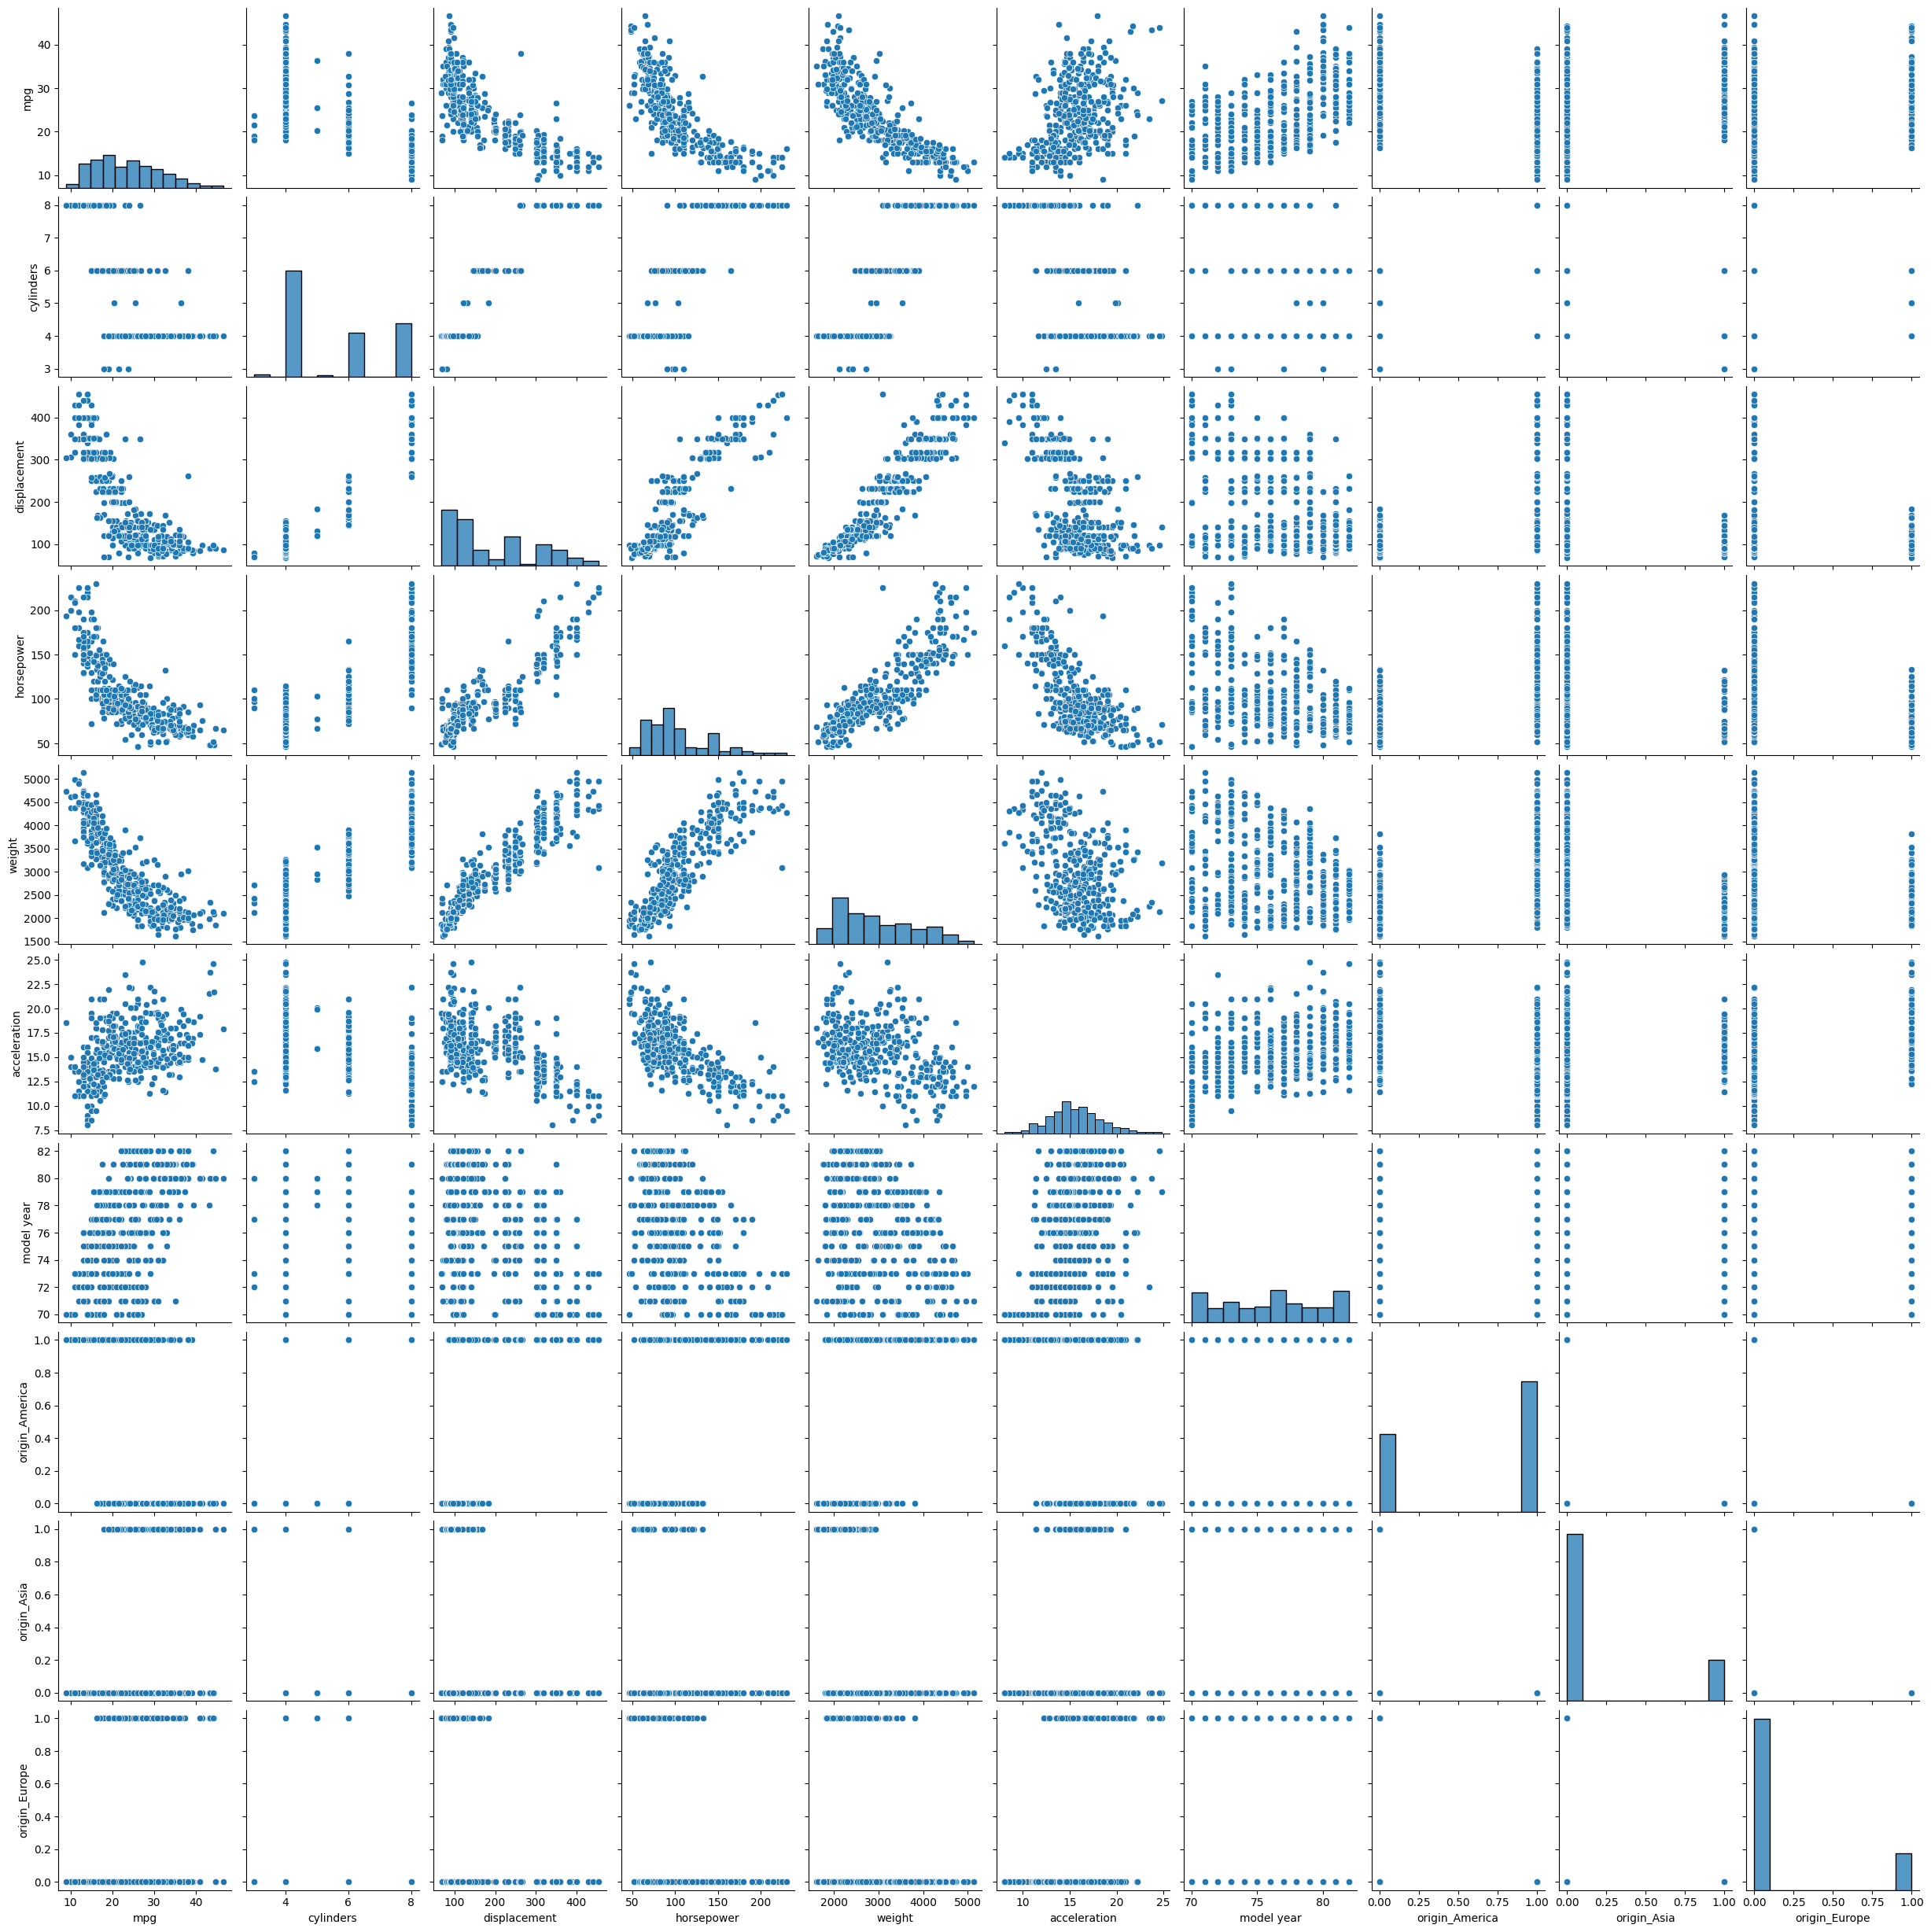

In [28]:
sns.pairplot(df)

**Now we splt the data into train and test**

In [31]:
Y=df["mpg"]
X=df.drop(["mpg"],axis=1)

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

**Now we fit the linear model**

In [33]:
model1=LinearRegression()

In [34]:
model1.fit(X_train,Y_train)

LinearRegression()

In [35]:
model1.score(X_train,Y_train)

0.8141025501610559

In [36]:
model1.score(X_test,Y_test)

0.8433135132808827